##  绘画决策边界

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P
          ,colors="k"
          ,levels=[-1 ,0, 1]
          ,alpha=0.5
          ,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

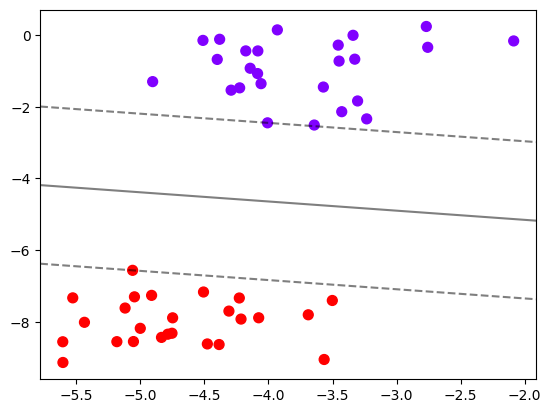

In [3]:
x, y = make_blobs(n_samples=50, centers=2, random_state=420, cluster_std=0.7)
svc = SVC(kernel="linear").fit(x, y)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(svc)

## 乳腺癌数据测试

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = load_breast_cancer()
x = data.data
x = StandardScaler().fit_transform(x)
y = data.target
xtrain,xtest,ytrain,ytest= train_test_split(x, y, test_size=0.3, random_state=420)

In [6]:
svc = SVC(kernel="rbf", gamma="auto").fit(xtrain, ytrain)

In [7]:
svc.score(xtest, ytest)

0.9707602339181286

## 异常检测

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import numpy as np

In [9]:
iris = load_iris()
data = iris.data
x = iris.data[:, [2, 3]]
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(x)

In [10]:
y_pred = model.predict(x)
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


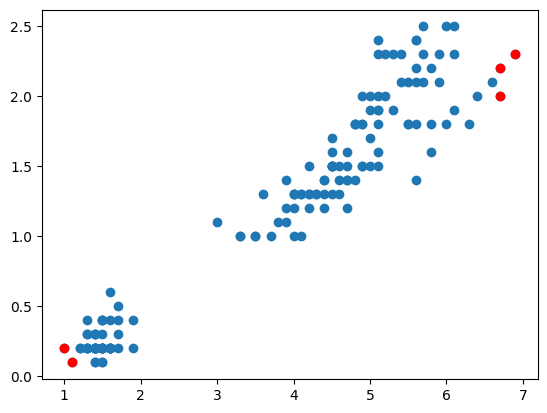

In [11]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[y_pred==-1,0], x[y_pred==-1,1], c='r')